# MT-related figures
This notebook reproduces result figures in the paper that came from the distributed diameter cases, with MT effects only (Figure 8)

In [1]:
# First import the relevant packages and functions
from local_optim_fit import forge_axcaliber, fit_params
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Fit the raw data
We use two custom functions based on dmipy package and scipy to create our forward model -- the two-compartment model (`forge_axcaliber`), and fit the model to simulated data (`fit_params`).

In [2]:
# Create lists to store fitted parameters and fitting costs (squared errors)
costs = []
params = []

# Call the custom function to construct the forward model from interpolating simulated dictionary of intraaxonal signals at different radius values.
forward_model = forge_axcaliber()

# Loop through the relevant MT values and fit the forward model to the total signal. Note MT strength defined as the effective T2 it introduces 
for MT in range(30, 301, 10):
    r = 2 # set the correct mean radius value
    
    # read the relevant signal file
    simdata = pd.read_csv("./MT_results/signal_MT_"+ str(MT) + "_sus_0_perm_0.000_rmean_" + '{0:.2f}'.format(r) + "_density_0.65.csv", header=None)
    y = simdata[2].to_numpy()/simdata[2][0] # and calculate the DW attenuation
    
    # Fit the model using the custom function which performs a least square fitting
    cost, param = fit_params(forward_model, y)

    # Store the fitting costs and fitted parameters in the correct lists
    costs.append(cost)
    params.append(param)

To skip fitting parameters from raw data, use the pre-fitted parameters

In [3]:
file_path = "precomputed_mt_params.pickle"
with open(file_path, 'rb') as file:
    params = pickle.load( file)

### Figure 8a
Plot the fitted diameters across the range of MT-induced effective T2 values.

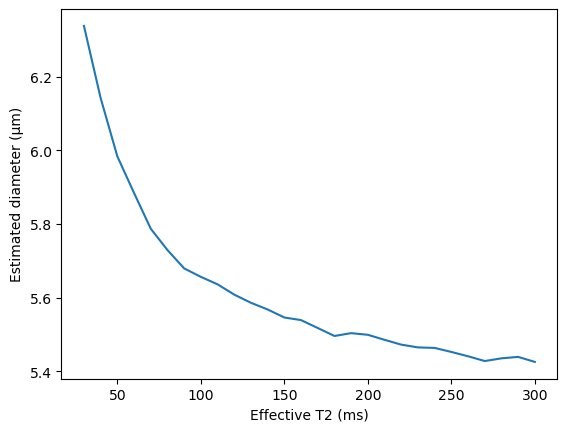

In [4]:
# Create a list to store fitted diameters
nm_rfit = []

# For each MT effective T2 value extract the fitted diameter (3rd sub element in the dictionary element)
for a in params:
    nm_rfit.append(a["Nelder-Mead"][2])

# Plot the fitted diameters across all effective T2 values
plt.plot(np.arange(30, 301, 10),np.array(nm_rfit)*2, label="Distributed diameters")
plt.xlabel("Effective T2 (ms)")
plt.ylabel("Estimated diameter (μm)")
plt.show()

### Figure 8b
Plot the fitted volume fractions across the range of MT-induced effective T2 values

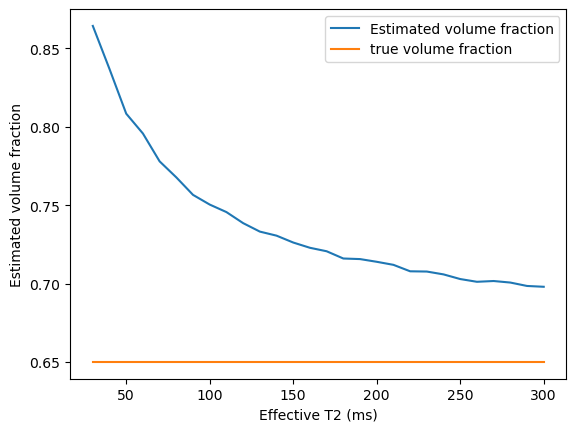

In [5]:
# Create a list to store fitted volume fractions
nm_vfit = []

# For each MT effective T2 values extract the fitted volume fraction (1st sub element in the dictionary element)
for a in params:
    nm_vfit.append(a["Nelder-Mead"][0])

# Plot the fitted diameters across all effective T2 values
plt.plot(np.arange(30, 301, 10),np.array(nm_vfit), label="Estimated volume fraction")

# Plot the true volume fraction for reference
plt.plot([30,300],[0.65,0.65], label="true volume fraction")
plt.xlabel("Effective T2 (ms)")
plt.ylabel("Estimated volume fraction")
plt.legend()
plt.show()
